# Comparaison des résultats sur le courant de Somalie

In [1]:
## Import packages
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import scipy
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
import netCDF4 as NC4
import datetime



## Lecture du courant géostrophique

In [2]:
os.chdir('/home/acuevas/Bureau/CDD_ifermer/alexandra_globcurrent/geostrophic')

In [3]:
#Lecture du 27 aout 2016 netcdf
file_geos='20160827000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v03.0-fv01.0.nc'

##### Read all the variables we need from the NetCDF file
nc_current=NC4.Dataset(file_geos)
print("Variables disponibles")
for var_name in nc_current.variables:
      print(var_name)
        
####### Variables
lat=nc_current.variables['lat'][:]
lon=nc_current.variables['lon'][:]
time=nc_current.variables['time'][:]
U_geos=nc_current.variables['eastward_geostrophic_current_velocity'][0,:,:]
V_geos=nc_current.variables['northward_geostrophic_current_velocity'][0,:,:]

ntime=np.shape(time)
ncurrent=np.shape(U_geos)

current_intensity=np.sqrt(U_geos**2+V_geos**2)
print(np.max(current_intensity))
print(np.min(current_intensity))

Variables disponibles
time
lat
lon
eastward_geostrophic_current_velocity
eastward_geostrophic_current_velocity_error
northward_geostrophic_current_velocity
northward_geostrophic_current_velocity_error
5.655181420365368
0.00011660980025597876


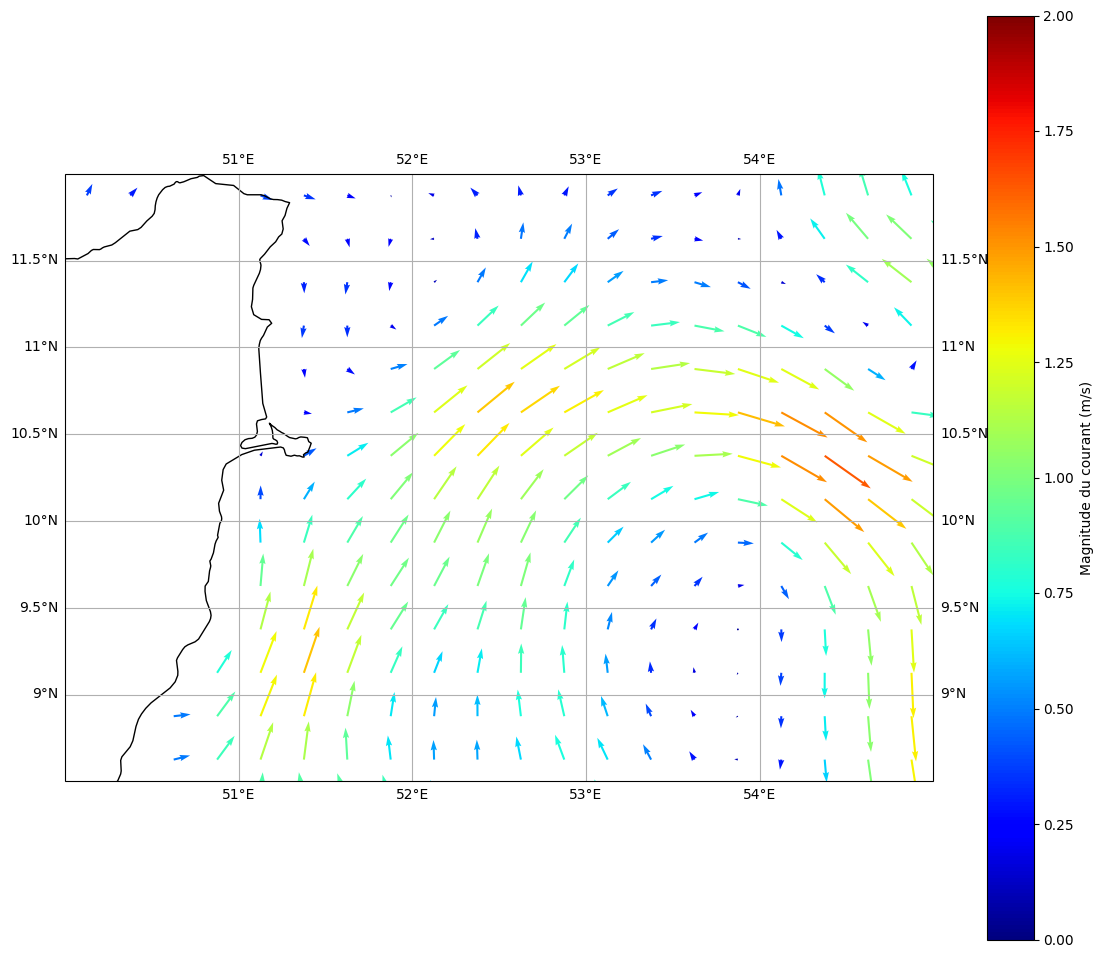

In [4]:
## Carte des courants géostrophiques
vmin=0

vmax=2
scale_quiver = 25
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
q1 = ax.quiver(lon, lat, U_geos, V_geos,current_intensity,scale=scale_quiver, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# Créer une normalisation basée sur les valeurs combinées
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])


# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')

# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)
# Configuration des axes
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')

ax.set_xlim(50, 55)
ax.set_ylim(8.5, 12)

# Ajouter une grille
ax.gridlines(draw_labels=True)
plt.savefig('current_geos_2016.png')
# Affichage de la carte
plt.show()




# Scatter plot avec les données

In [5]:
## Load des courants S2

# Charger les tableaux 
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/2016/Results/2025/boxsize_500_test2/')

 # PWL
U_PWL = np.load('U_PWL.npy')
V_PWL = np.load('V_PWL.npy')

lat_PWL=np.load('lat_PWL.npy')
lon_PWL=np.load('lon_PWL.npy')

C_PWL=np.load('C_PWL.npy')


# PMW
U_PWM = np.load('U_PWM.npy')
V_PWM = np.load('V_PWM.npy')

lat_PWM=np.load('lat_PWM.npy')
lon_PWM=np.load('lon_PWM.npy')

C_PWM=np.load('C_PWM.npy')

#PWN

U_PWN = np.load('U_PWN.npy')
V_PWN = np.load('V_PWN.npy')

lat_PWN=np.load('lat_PWN.npy')
lon_PWN=np.load('lon_PWN.npy')

C_PWN=np.load('C_PWN.npy')


# PXM

U_PXM = np.load('U_PXM.npy')
V_PXM = np.load('V_PXM.npy')

lat_PXM=np.load('lat_PXM.npy')
lon_PXM=np.load('lon_PXM.npy')

C_PXM=np.load('C_PXM.npy')


# PXN

U_PXN = np.load('U_PXN.npy')
V_PXN = np.load('V_PXN.npy')

lat_PXN=np.load('lat_PXN.npy')
lon_PXN=np.load('lon_PXN.npy')

C_PXN=np.load('C_PXN.npy')

# PXL

U_PXL = np.load('U_PXL.npy')
V_PXL = np.load('V_PXL.npy')

lat_PXL=np.load('lat_PXL.npy')
lon_PXL=np.load('lon_PXL.npy')

C_PXL=np.load('C_PXL.npy')


# PYM

U_PYM = np.load('U_PYM.npy')
V_PYM = np.load('V_PYM.npy')

lat_PYM=np.load('lat_PYM.npy')
lon_PYM=np.load('lon_PYM.npy')

C_PYM=np.load('C_PYM.npy')


# PYN

U_PYN = np.load('U_PYN.npy')
V_PYN = np.load('V_PYN.npy')

lat_PYN=np.load('lat_PYN.npy')
lon_PYN=np.load('lon_PYN.npy')

C_PYN=np.load('C_PYN.npy')

# PYL

U_PYL = np.load('U_PYL.npy')
V_PYL = np.load('V_PYL.npy')

lat_PYL=np.load('lat_PYL.npy')
lon_PYL=np.load('lon_PYL.npy')

C_PYL=np.load('C_PYL.npy')



In [6]:
# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]

magnitude_threshold =2 # Ajuster ce seuil en fonction des données

In [7]:
lon_PWL1, lat_PWL1, U_PWL1, V_PWL1, C_PWL1 = filter_vectors(lon_PWL, lat_PWL, U_PWL, V_PWL, C_PWL, magnitude_threshold)
lon_PWM1, lat_PWM1, U_PWM1, V_PWM1, C_PWM1 = filter_vectors(lon_PWM, lat_PWM, U_PWM, V_PWM, C_PWM, magnitude_threshold)
lon_PWN1, lat_PWN1, U_PWN1, V_PWN1, C_PWN1 = filter_vectors(lon_PWN, lat_PWN, U_PWN, V_PWN, C_PWN, magnitude_threshold)

lon_PXM1, lat_PXM1, U_PXM1, V_PXM1, C_PXM1 = filter_vectors(lon_PXM, lat_PXM, U_PXM, V_PXM, C_PXM, magnitude_threshold)
lon_PXN1, lat_PXN1, U_PXN1, V_PXN1, C_PXN1 = filter_vectors(lon_PXN, lat_PXN, U_PXN, V_PXN, C_PXN, magnitude_threshold)
lon_PXL1, lat_PXL1, U_PXL1, V_PXL1, C_PXL1 = filter_vectors(lon_PXL, lat_PXL, U_PXL, V_PXL, C_PXL, magnitude_threshold)

lon_PYM1, lat_PYM1, U_PYM1, V_PYM1, C_PYM1 = filter_vectors(lon_PYM, lat_PYM, U_PYM, V_PYM, C_PYM, magnitude_threshold)
lon_PYN1, lat_PYN1, U_PYN1, V_PYN1, C_PYN1 = filter_vectors(lon_PYN, lat_PYN, U_PYN, V_PYN, C_PYN, magnitude_threshold)
lon_PYL1, lat_PYL1, U_PYL1, V_PYL1, C_PYL1 = filter_vectors(lon_PYL, lat_PYL, U_PYL, V_PYL, C_PYL, magnitude_threshold)

In [8]:
US2=np.concatenate([U_PWL1,U_PWM1,U_PWN1,U_PXL1,U_PXM1,U_PXN1,U_PYL1,U_PYM1,U_PYN1])
VS2=np.concatenate([V_PWL1,V_PWM1,V_PWN1,V_PXL1,V_PXM1,V_PXN1,V_PYL1,V_PYM1,V_PYN1])

latS2=np.concatenate([lat_PWL1,lat_PWM1,lat_PWN1,lat_PXL1,lat_PXM1,lat_PXN1,lat_PYL1,lat_PYM1,lat_PYN1])
lonS2=np.concatenate([lon_PWL1,lon_PWM1,lon_PWN1,lon_PXL1,lon_PXM1,lon_PXN1,lon_PYL1,lon_PYM1,lon_PYN1])
CS2=np.sqrt(US2**2+VS2**2)



# print('shape US2',np.shape(US2))
# print('shape latS2',np.shape(latS2))
# print('shape lonS2',np.shape(lonS2))

In [9]:
min_lat=min(latS2)
min_lon=min(lonS2)
max_lat=max(latS2)
max_lon=max(lonS2)

lon_grid, lat_grid=np.meshgrid(lon,lat)

mask_lon=(lon_grid>=min_lon)&(lon_grid<max_lon)
mask_lat=(lat_grid>=min_lat)&(lat_grid<max_lat)


lon1=lon_grid[mask_lon & mask_lat]
lat1=lat_grid[mask_lon & mask_lat]
U1=U_geos[mask_lon & mask_lat]
V1=V_geos[mask_lon & mask_lat]
current_intensity1=current_intensity[mask_lon & mask_lat]

#################################

mask2 = (lonS2>= min_lon) & (lonS2 <= max_lon) & \
       (latS2 >= min_lat) & (latS2 <= max_lat)

lonS2 = lonS2[mask2]
latS2 = latS2[mask2]
US2 = US2[mask2]
VS2=VS2[mask2]
CS2=CS2[mask2]
#################################

print('shape current intensity',np.shape(current_intensity1))
print('shape U',np.shape(U1))
print('shape V',np.shape(V1))
print('shape lat',np.shape(lat1))
print('shape lon', np.shape (lon1))

shape current intensity (10105,)
shape U (10105,)
shape V (10105,)
shape lat (10105,)
shape lon (10105,)


In [10]:
# ############# interpolation des données pour le scatter plot

# ###### Résumé des shapes
# ### S2
# print('shape US2',np.shape(US2))

# print('shape latS2',np.shape(latS2))
# print('shape lonS2',np.shape(lonS2))

# ### globcurrent

# print('shape U',np.shape(U1))
# print('shape lat',np.shape(lat1))
# print('shape lon', np.shape (lon1))

In [11]:
# print('max lon S2',max(lonS2))
# print('max lon ',max(lon1))
# print('min lon S2',min(lonS2))
# print('min lon ',min(lon1))

# print('max lat S2',max(latS2))
# print('max lat ',max(lat1))
# print('min lat S2',min(latS2))
# print('min lat ',min(lat1))

In [12]:
 # Calculer les intensités et directions pour Globcurrent
intensity_glob = np.sqrt(U1**2 + V1**2)  # Intensité pour Globcurrent
direction_glob = (np.arctan2(V1, U1) * 180 / np.pi) % 360  # Direction pour Globcurrent

# Interpoler Globcurrent sur les coordonnées de S2
intensity_glob_on_S2 = griddata((lon1, lat1), intensity_glob, (lonS2, latS2), method='linear')
direction_glob_on_S2 = griddata((lon1, lat1), direction_glob, (lonS2, latS2), method='linear')

U1_glob_onS2=griddata((lon1,lat1),U1,(lonS2, latS2), method='linear')
V1_glob_onS2=griddata((lon1,lat1),V1,(lonS2, latS2), method='linear')



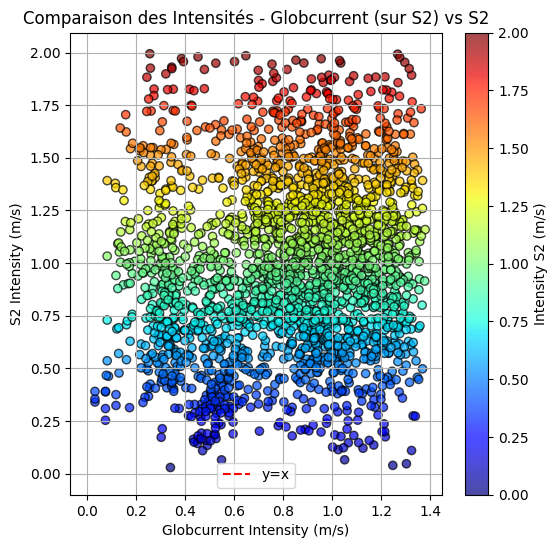

RMS= nan


In [13]:
from scipy.stats import pearsonr
# Tracer le scatter plot pour les intensités
plt.figure(figsize=(6, 6))
scatter=plt.scatter(intensity_glob_on_S2, np.sqrt(US2**2 + VS2**2), alpha=0.7, c=CS2, cmap='jet', edgecolor='k', vmin=vmin, vmax=vmax)
plt.plot([0, max(intensity_glob_on_S2.max(), np.sqrt(US2**2 + VS2**2).max())],
         [0, max(intensity_glob_on_S2.max(), np.sqrt(US2**2 + VS2**2).max())], 'r--', label='y=x')
plt.colorbar(scatter, label='Intensity S2 (m/s)')  # Ajouter une colorbar

plt.title('Comparaison des Intensités - Globcurrent (sur S2) vs S2')
plt.xlabel('Globcurrent Intensity (m/s)')
plt.ylabel('S2 Intensity (m/s)')
plt.legend()
plt.grid()
plt.show()

rms = np.sqrt(np.mean((CS2 - intensity_glob_on_S2) ** 2))
print('RMS=',rms)



RMS= nan


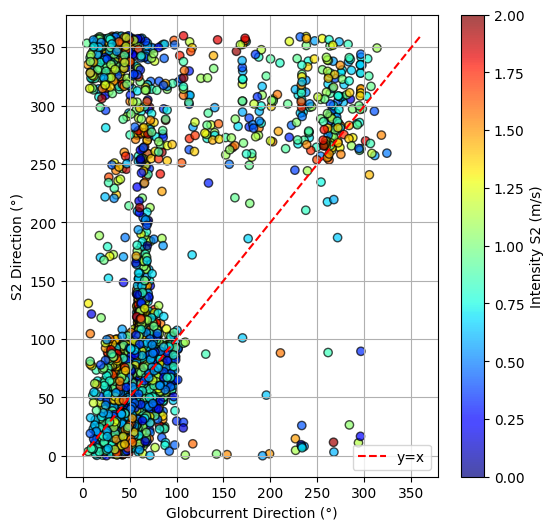

In [14]:
# Calculer les directions pour S2
direction_S2 = (np.arctan2(VS2, US2) * 180 / np.pi)%360

rms = np.sqrt(np.mean((direction_S2 - direction_glob_on_S2) ** 2))
print('RMS=',rms)
vmin=0
vmax=2
plt.figure(figsize=(6, 6))
scatter = plt.scatter(direction_glob_on_S2, direction_S2, c=CS2, cmap='jet', alpha=0.7, edgecolor='k', vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Intensity S2 (m/s)')  # Ajouter une colorbar
plt.plot([0, 360], [0, 360], 'r--', label='y=x')  # Ligne de correspondance idéale
# plt.title('Comparaison des Directions - Globcurrent (sur S2) vs S2')
plt.xlabel('Globcurrent Direction (°)')
plt.ylabel('S2 Direction (°)')
plt.legend()
plt.grid()
plt.show()

In [34]:
# On va prendre les points les plus proches et comparer les vecteurs
# + Revoir comparaison quantitative ...

In [16]:
# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords



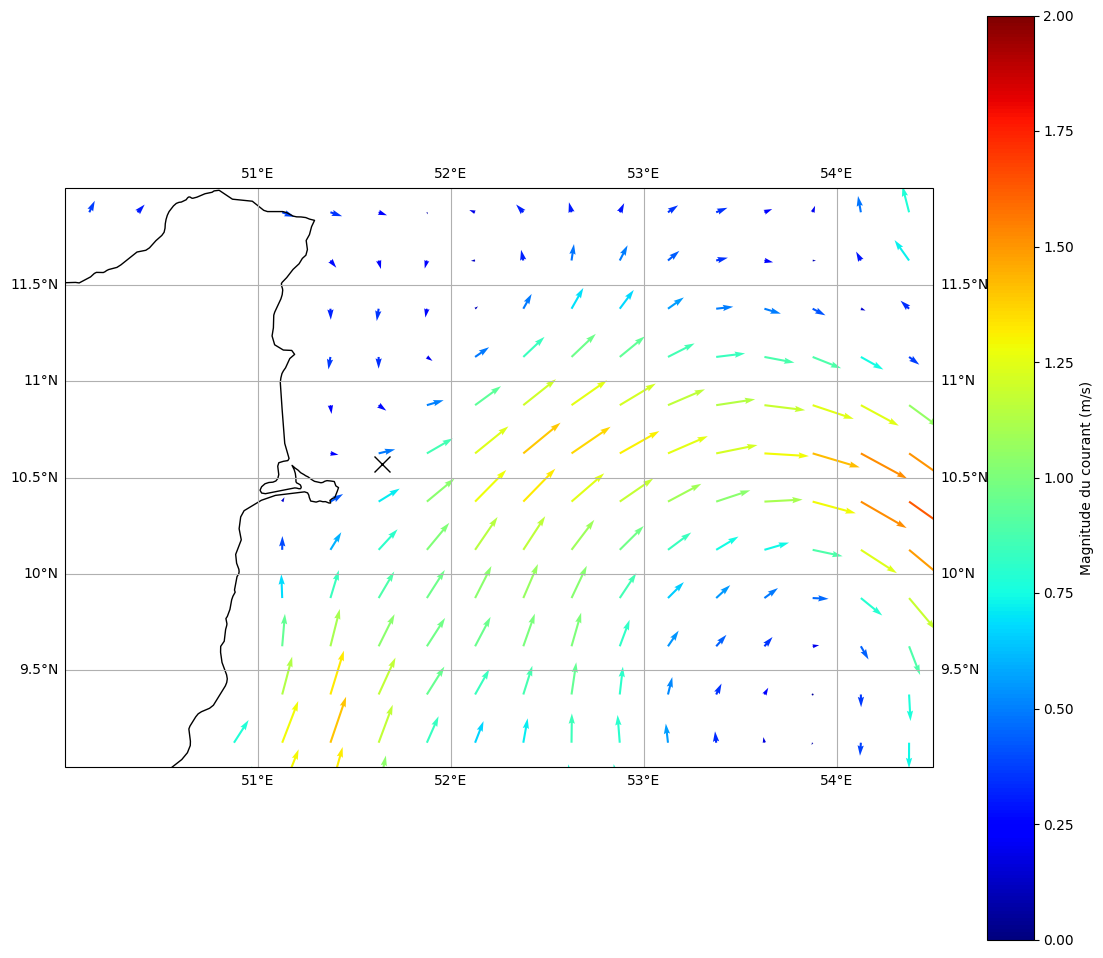

In [35]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## Carte des courants géostrophiques
# vmin=np.min(current_intensity)
vmin=0
vmax=2
scale_quiver = 25
LonC, LatC = 51.64,10.57  # Exemple : centre à Paris

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
q1 = ax.quiver(lon, lat, U_geos, V_geos,current_intensity,scale=scale_quiver, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree())

# Tracer le point

# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude du courant (m/s)')
# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)

ax.plot(LonC, LatC,marker='x',color='black',markersize=12,transform=ccrs.PlateCarree())

# Configuration des axes
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')

ax.set_xlim(50, 54.5)
ax.set_ylim(9, 12)

# Ajouter une grille
ax.gridlines(draw_labels=True)

# Affichage de la carte
plt.show()



In [18]:
# print(lats)